# Ex07 - Propriedades da DFT

### Parte 1 - Convolução periódica

Tente entender a convolução periódica [(notebook)](11 Teorema da Convolucao.ipynb), comparando-a com a convolução já estudada anteriormente (scypi.signal.convolve2d). Avalie as diferenças em um exemplo numérico pequeno e depois, utilizando uma imagem.

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import *
from PIL import Image

import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

def disp(f, sub_title = [], max_row_size = 3, dpi=72, axis='off'):
    #from PIL import Image
    #import matplotlib.pyplot as plt
    
    images=[]
    for f_i in f:
        images.append(Image.fromarray(f_i))

    # tamanho do display de cada imagem 
    dpi=dpi  # padrao da funcao display da biblioteca PIL
    altura,largura=images[0].size # em pixels (assumimos o mesmo tamanho da primeira para todas)
    figsizeinches=largura/float(dpi),altura/float(dpi) # em polegadas
    fig = plt.figure(figsize=figsizeinches)

    # valores iniciais
    xpos=0
    ypos=0
    espacamento=0.3
    tam=1

    #mod
    i=0

    for image in images:
        ax=fig.add_axes([xpos,ypos,tam,tam]) 
        ax.axis(axis)
        if len(f) == len(sub_title):
            ax.set_title(sub_title[i])
        ax.imshow(image)

        # incrementos
        i=i+1                  # contagem de figuras
        if i%max_row_size==0:  # troca de linha
            xpos=0
            ypos=ypos-tam-espacamento
        else:                  # continua na linha
            xpos=xpos+tam+espacamento
    plt.show()

Utilizando um exemplo numérico para ilustrar a convolução periódica:

In [4]:
f = np.array([[0,0,0,0,0],
             [0,0,1,1,0],
             [0,1,3,2,0],
             [0,1,3,1,0],
             [0,1,1,0,0]])
print("Image (f):")
print(f)
    
#filtro da média
s = 3
h = np.ones((s,s))/(s*s)
print("\n Image Kernel (h):")
print(h.round(2))
    
g1 = ia.pconv(f,h)
print("Image Output (pconv):")
print(g1.round(2))

convL = signal.convolve2d(f, h)
print("Image Output (convolve2d):")
print(convL.round(2))

Image (f):
[[0 0 0 0 0]
 [0 0 1 1 0]
 [0 1 3 2 0]
 [0 1 3 1 0]
 [0 1 1 0 0]]

 Image Kernel (h):
[[0.11 0.11 0.11]
 [0.11 0.11 0.11]
 [0.11 0.11 0.11]]
Image Output (pconv):
[[0.11 0.22 0.67 0.78 0.56]
 [0.11 0.11 0.33 0.44 0.33]
 [0.33 0.11 0.56 0.89 0.78]
 [0.44 0.22 1.   1.44 1.22]
 [0.33 0.33 1.11 1.44 1.11]]
Image Output (convolve2d):
[[0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.11 0.22 0.22 0.11 0.  ]
 [0.   0.11 0.56 0.89 0.78 0.33 0.  ]
 [0.   0.22 1.   1.44 1.22 0.44 0.  ]
 [0.   0.33 1.11 1.44 1.11 0.33 0.  ]
 [0.   0.22 0.67 0.78 0.56 0.11 0.  ]
 [0.   0.11 0.22 0.22 0.11 0.   0.  ]]


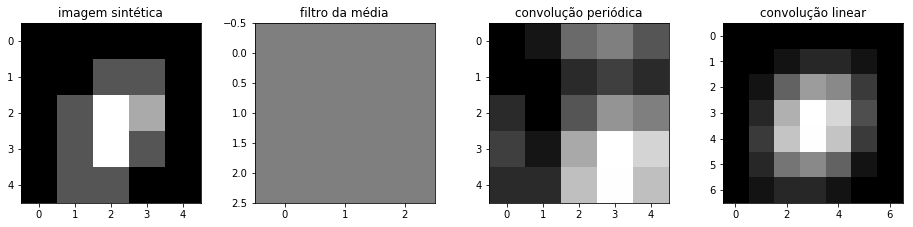

In [5]:
disp([ia.normalize(f, [0,255]), ia.normalize(h, [0,255]), ia.normalize(g1, [0,255]), ia.normalize(convL, [0,255])], 
     ['imagem sintética', 'filtro da média', 'convolução periódica', 'convolução linear'], 
     max_row_size = 4, dpi=2, axis = 'on')

O resultado da convolução periódica visualmente se parece com a da convolução linear, porém transladada periodicamente. Além disso, como sabemos que a convolução, por padrão, resulta em uma imagem maior que a imagem original, por isso, para efeitos de comparação, foi passado como argumento o "mode= 'same'", para que o resultado seja do mesmo tamanho da original. Pois a convolução periódica resulta em uma imagem do mesmo tamanho.


- Desafio opcional: crie um exemplo com uma imagem numérica pequena e um kernel 3x3. Tente obter o mesmo resultado usando a função *convp* e a função *scypi.signal.convolve2d*. Ou seja, implemente a convolução periódica a partir da convolução linear.

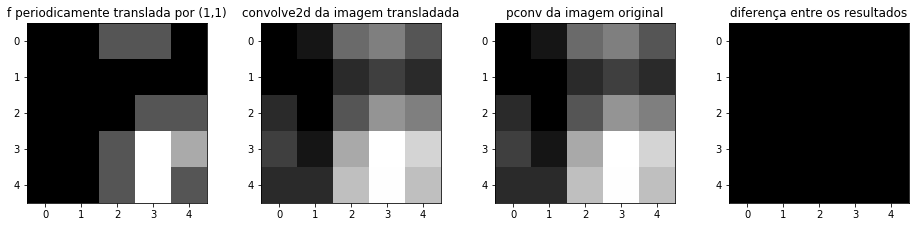

In [6]:
def ptrans2d(f,t):
    rr,cc = t
    H,W = f.shape
    
    r = rr%H
    c = cc%W
        
    g = np.empty_like(f)
    
    g[:r,:c] = f[H-r:H,W-c:W]
    g[:r,c:] = f[H-r:H,0:W-c]
    g[r:,:c] = f[0:H-r,W-c:W]
    g[r:,c:] = f[0:H-r,0:W-c]

    return g

dh,dw = (1,1)
g3 = ptrans2d(f, (dh, dw))
convL2 = signal.convolve2d(g3, h, boundary='wrap', mode='same')
disp([ia.normalize(g3, [0,255]), ia.normalize(convL2, [0,255]), ia.normalize(g1, [0,255]), np.abs(convL2 - g1)], 
     ['f periodicamente translada por (%d,%d)' % (dh,dw), 'convolve2d da imagem transladada', 'pconv da imagem original', 'diferença entre os resultados'], 
     max_row_size = 4, dpi=2, axis = 'on')

Podemos perceber através da comparação visual entre a convolução linear da imagem transladada e a convolução periódica da imagem original que essas operações são equivalentes, pois tem o mesmo resultado.

### Parte 2 - Teorema da convolução

Crie uma demonstração usando imagens para o Teorema da Convolução. Lembre-se, o objetivo é mostrar que o teorema é válido.

O teorema da convolução diz que 
$$ F(f * g) = F(f) \cdot F(g) $$
$$ F(f\cdot g) = F(f) * F(g) $$ 


onde $F$ indica o operador da transformada de Fourier, ou seja, $F(f)$ e $F(g)$ são as transformdas de $f$ e $g$. É importante perceber que a convolução usada aqui é a convolução periódica. 

Aproveitando o resultado do exercício anterior, vamos ilustrar a convolução periódica da imagem $f$, 5x5, o filtro da média $g$ 3x3 e o espectro de Fourier do resultado dessa convolução, ou seja, a última imagem representa a primeira parte da equação do teorema $F(f * g)$:

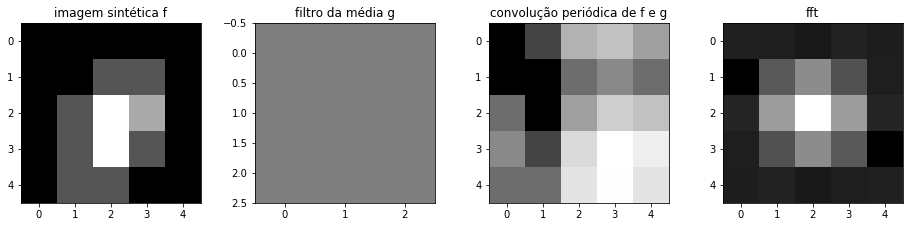

In [51]:
def fft_disp(f):
    faux = f
    F = fft2(faux)
    H,W = faux.shape
    return ia.normalize(np.log(np.abs(ia.ptrans(F,(H//2,W//2))+1)), [0,255])

fft1 = fft_disp(g1)

disp([ia.normalize(f, [0,255]), ia.normalize(h, [0,255]), ia.normalize(np.log(g1), [0,255]), fft1], 
     ['imagem sintética f', 'filtro da média g', 'convolução periódica de f e g', 'fft'], 
     max_row_size = 4, dpi=2, axis = 'on')

A segunda parte $F(f) \cdot F(g)$, será ilustrada abaixo. A primeira imagem é a transformada de $f$, a segunda é a transformada de $g$, a terceira é a multiplicação dessas duas transformadas e a quarta é a transformada inversa da terceira. Para efeito de visualização, foi aplicada a função logaritmo e o resultado normalizado entre 0 e 255.

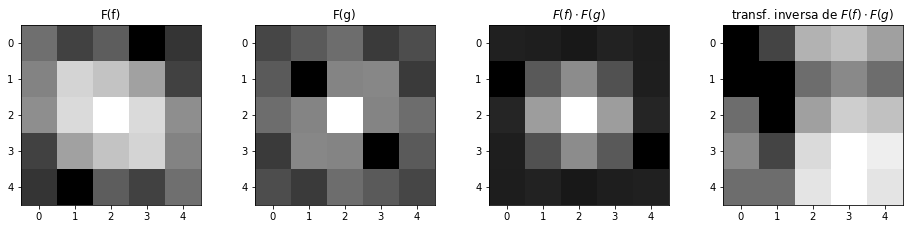

In [80]:
# Aumentando h para o tamanho de f
aux = np.zeros(f.shape)
r,c = h.shape
aux[:r,:c] = h

fftF = fft2(f)
fftG = fft2(aux)
G = fftF * fftG
H,W = G.shape

gg = ifft2(G)

disp([fft_disp(f), fft_disp(aux), ia.normalize(np.log(np.abs(ia.ptrans(G,(H//2,W//2))+1)), [0,255]), ia.normalize(np.log(np.abs(gg)), [0,255])], 
     ['F(f)', 'F(g)', '$F(f) \cdot F(g)$', 'transf. inversa de $F(f) \cdot F(g)$'], 
     max_row_size = 4, dpi=2, axis = 'on')

Para comparar os resultados, garantindo que os dois lados da equação estão iguais, vamos colocá-los lado a lado e fazer a subtração, tanto da multiplicação de $f$ e $g$ com a transformada de Fourier da convolução periódica quanto da transformada inversa da multiplicação com a convolução periódica de $f$ e $g$. Ambas as comparações devem ser iguais, ou seja, a subtração deve resultar em uma matriz de zeros. Também é possível utilizar a função do numpy "allclose" para verificar os valores.

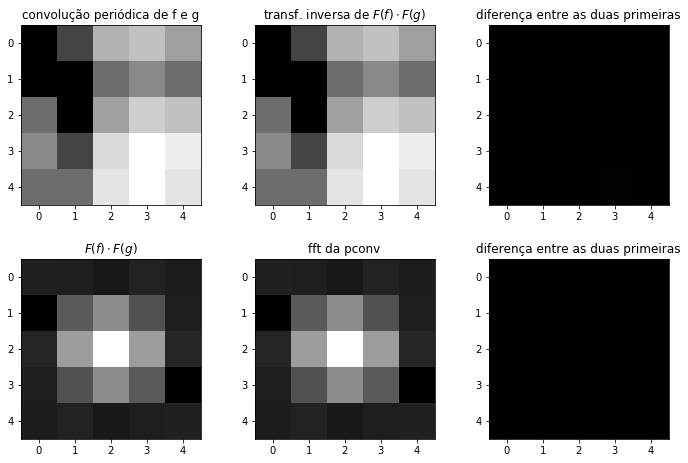

O teorema da convolução funcionou para a primeira comparação? True
O teorema da convolução funcionou para a segunda comparação? True


In [81]:
fftInv = ia.normalize(np.log(np.abs(gg)), [0,255])
convP = ia.normalize(np.log(g1), [0,255])
dif_fftInv = np.abs(fftInv - convP)
F = fft2(g1)

multi = ia.normalize(np.log(np.abs(ia.ptrans(G,(H//2,W//2))+1)), [0,255])
dif_multi = np.abs(ia.normalize(np.log(np.abs(ia.ptrans(G,(H//2,W//2))+1)), [0,255]) - fft1)

disp([convP, fftInv, dif_fftInv,
     multi, fft1, dif_multi], 
     ['convolução periódica de f e g', 'transf. inversa de $F(f) \cdot F(g)$', 'diferença entre as duas primeiras',
      '$F(f) \cdot F(g)$', 'fft da pconv', 'diferença entre as duas primeiras'], 
     dpi=2, axis = 'on')

print('O teorema da convolução funcionou para a primeira comparação?', np.allclose(G,F))
print('O teorema da convolução funcionou para a segunda comparação?', np.allclose(np.abs(gg),g1))

Agora vamos ilustrar a segunda parte do teorema: $ F(f\cdot g) = F(f) * F(g) $. Para isso, vamos fazer, a multiplicação de $f$ e $g$ (aumentada para o mesmo tamanho de f) e depois aplicar a transformada de Fourier na matriz resultante. 

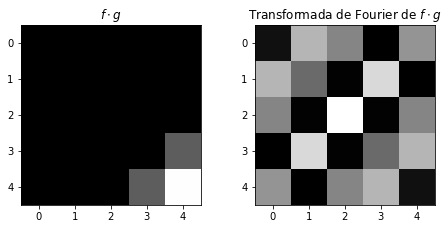

In [106]:
# Aumentando h para o tamanho de f
aux = np.zeros(f.shape)
r,c = h.shape
aux[:r,:c] = h

fg = f * aux
H,W = fg.shape

disp([ia.normalize(np.log(np.abs(ia.ptrans(fg,(H//2,W//2))+1)), [0,255]), fft_disp(fg)], 
     ['$f \cdot g$', 'Transformada de Fourier de $f\cdot g$'], 
     dpi=2, axis = 'on')

Para comprovar o teorema da convolução precisamos mostrar que o resultado acima é igual ao resultado da transformada de $f$ convolvida periodicamente com a transformada de $g$. Esses cálculos estão demonstrados abaixo:

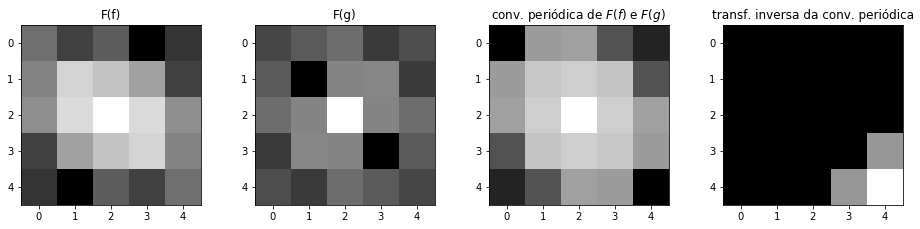

In [127]:
# Aumentando h para o tamanho de f
aux = np.zeros(f.shape)
r,c = h.shape
aux[:r,:c] = h

fftF = fft2(f)
fftG = fft2(aux)
g4 = ia.pconv(fftF,fftG)
H,W = g4.shape

gg1 = ifft2(g4)

disp([fft_disp(f), fft_disp(aux), ia.normalize(np.log(np.abs(ia.ptrans(g4,(H//2,W//2))+1)), [0,255]), ia.normalize(np.log(np.abs(ia.ptrans(gg1,(H//2,W//2))+1)), [0,255])], 
     ['F(f)', 'F(g)', 'conv. periódica de $F(f)$ e $F(g)$', 'transf. inversa da conv. periódica'], 
     max_row_size = 4, dpi=2, axis = 'on')

### Parte3 - Decomposição de uma imagem em senóides

Implemente uma função para demonstrar a decomposição/composição de uma imagem a partir da DFT. A ideia consiste em ter 4 figuras por iteração: 

- imagem original, 
- imagem recomposta até aquela iteração, 
- espectro de Fourier, e 
- última componente ("telha") a ser adicionada. 

A medida que um novo par *F(u,v)* e *F(-u,-v)* em cada iteração é adicionado para compor a imagem original, o par deve ser mostrado na janela do espectro de Fourier e na forma de imagem ("telha"). A ordem de pegar estas frequências pode ser uma varredura quadrada em torno do centro do espectro. Lembrar de pegar sempre um par simétrico da DFT, *F(u,v)* e *F(-u,-v)*. A função deverá receber como parâmetro de entrada quantas iterações serão realizadas, ou seja, quantas componentes serão adicionadas para compor a imagem original. 

0
1
2
3
4


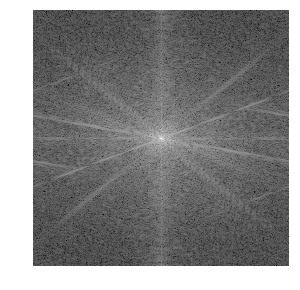

In [139]:
f = mpimg.imread('../data/cameraman.tif')

def decomposite(f, n):
    it = np.arange(n)
    fftF = fft_disp(f)
    for i in it:
        print(i)
    return fftF
        
disp([decomposite(f, 5)])